In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from Functions import *

In [4]:
df = pd.read_csv('D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_previous_application.csv')

In [5]:
df.head(5)

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,...,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,...,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  RATE_INTEREST_PRIMARY        4791 non-null

# Column Description

In [7]:
description = pd.read_csv('D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_columns_description.csv',encoding='latin',index_col=0)
description = description[description['Table'].str.contains('previous_application')].drop(columns = 'Table',axis = 1).set_index("Row")
description

,Description,Special
Row,,
SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
SK_ID_CURR,ID of loan in our sample,hashed
NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN
AMT_ANNUITY,Annuity of previous application,NaN
AMT_APPLICATION,For how much credit did client ask on the prev...,NaN
AMT_CREDIT,Final credit amount on the previous applicatio...,NaN
AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,NaN
WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...,NaN


# Pre check overall Dataframe

In [8]:
prev_check = pre_check_tool(df= df)

In [9]:
# Check per null
prev_check.check_per_null()

,number_missing,percent_missing
RATE_INTEREST_PRIMARY,1408910,99.661102
RATE_INTEREST_PRIVILEGED,1408910,99.661102
AMT_DOWN_PAYMENT,749540,53.019698
RATE_DOWN_PAYMENT,749540,53.019698
NAME_TYPE_SUITE,694672,49.138538
DAYS_FIRST_DRAWING,561106,39.690571
DAYS_FIRST_DUE,561106,39.690571
DAYS_LAST_DUE_1ST_VERSION,561106,39.690571
DAYS_LAST_DUE,561106,39.690571
DAYS_TERMINATION,561106,39.690571


In [10]:
# find cols that have null > 90%
print(prev_check.find_null_cols(0.9))

Index(['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'], dtype='object')


In [11]:
# drop col that having per null > 90%
df = df.drop(columns= ['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'])

In [12]:
#duplicate check
df.duplicated().sum()

0

In [13]:
# valid value
## Num data
prev_check.split_data()
prev_check.check_value_num()
print('\n\n\n')

## cat data
prev_check.check_value_cat()

SK_ID_PREV  has     >0 1413701,  =0 0  ,   <0 0,    nan: 0,   other values: 0
AMT_ANNUITY  has     >0 1105243,  =0 1240  ,   <0 0,    nan: 307218,   other values: 0
AMT_APPLICATION  has     >0 1088399,  =0 325302  ,   <0 0,    nan: 0,   other values: 0
AMT_CREDIT  has     >0 1137123,  =0 276577  ,   <0 0,    nan: 1,   other values: 0
AMT_DOWN_PAYMENT  has     >0 350184,  =0 313975  ,   <0 2,    nan: 749540,   other values: 0
AMT_GOODS_PRICE  has     >0 1088416,  =0 5760  ,   <0 0,    nan: 319525,   other values: 0
HOUR_APPR_PROCESS_START  has     >0 1413609,  =0 92  ,   <0 0,    nan: 0,   other values: 0
RATE_DOWN_PAYMENT  has     >0 350184,  =0 313975  ,   <0 2,    nan: 749540,   other values: 0
RATE_INTEREST_PRIMARY  has     >0 4791,  =0 0  ,   <0 0,    nan: 1408910,   other values: 0
RATE_INTEREST_PRIVILEGED  has     >0 4791,  =0 0  ,   <0 0,    nan: 1408910,   other values: 0
DAYS_DECISION  has     >0 0,  =0 0  ,   <0 1413701,    nan: 0,   other values: 0
SELLERPLACE_AREA  has     

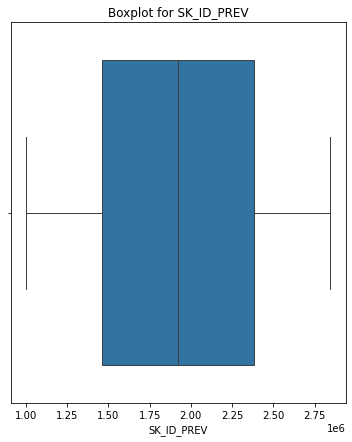

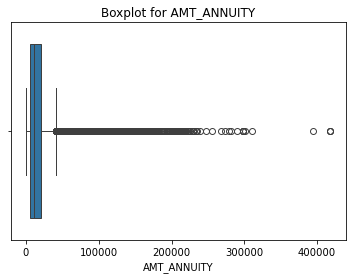

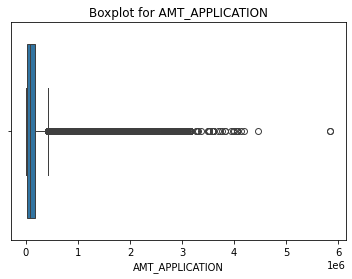

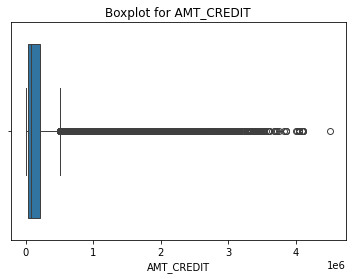

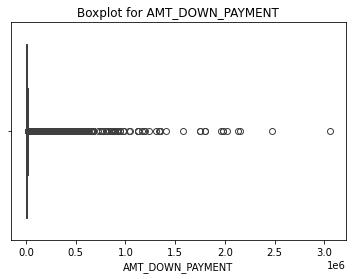

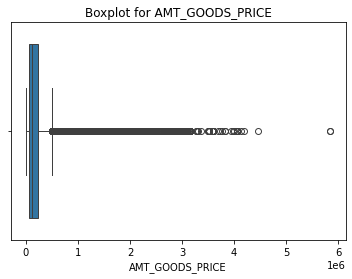

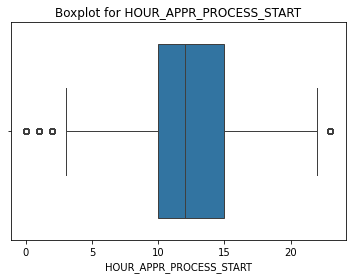

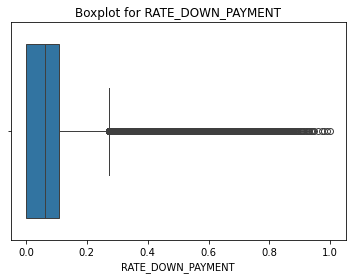

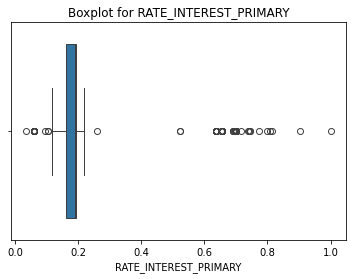

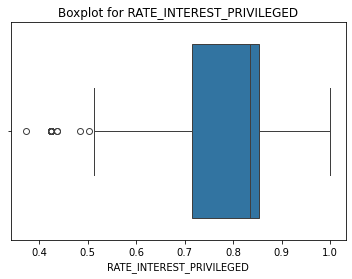

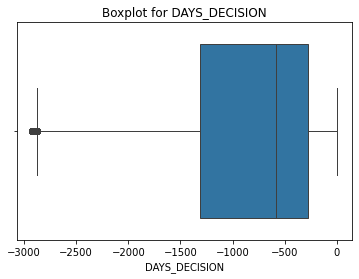

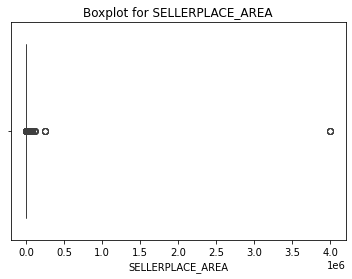

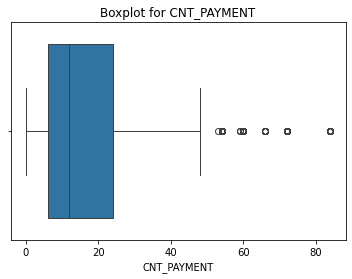

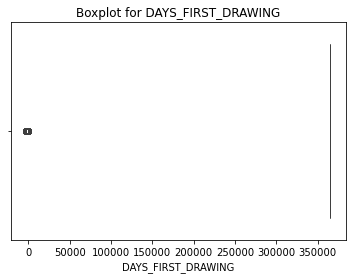

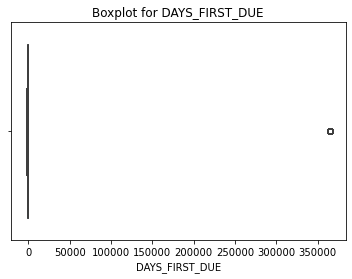

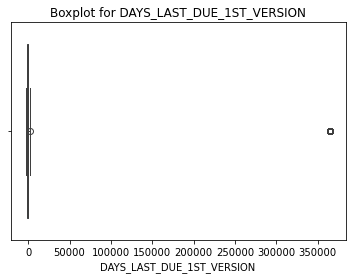

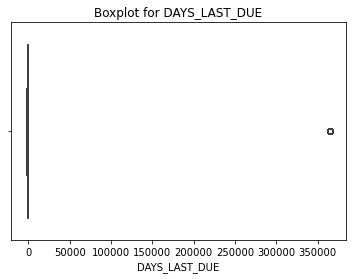

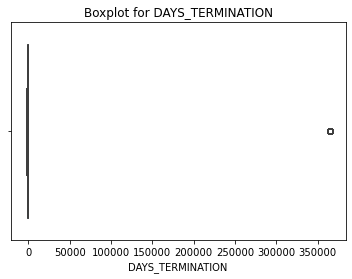

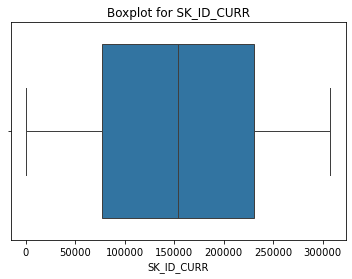

In [14]:
prev_check.show_outliers()

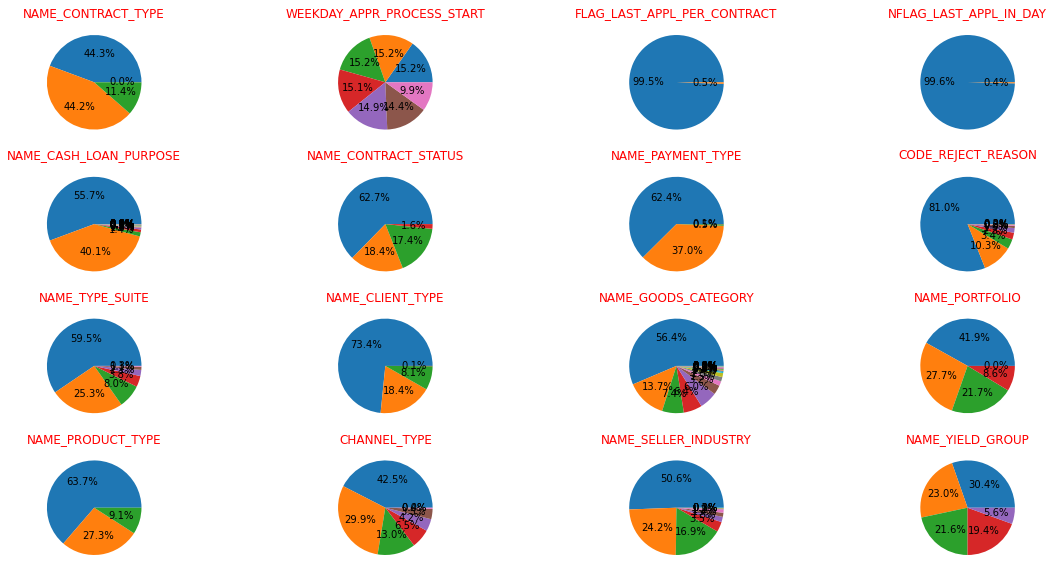

In [15]:
prev_check.dist_catchart()

# Data Exploration

## EDA Internal

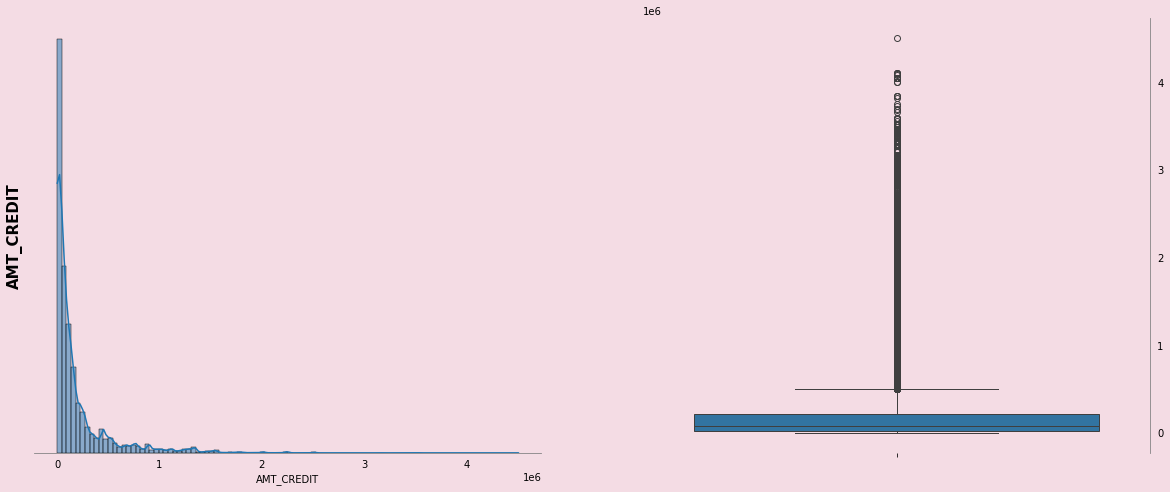

In [16]:
# AMT_CREDIT
obj1 = Univariate_Analysis(df= df, col= 'AMT_CREDIT', num= True)
obj1.visualize()

* Hầu hết các khoản vay đều khá là ít (trong khoảng 0 - 1,000,000) nhưng vẫn còn những khoản vay có giá trị rất lớn.

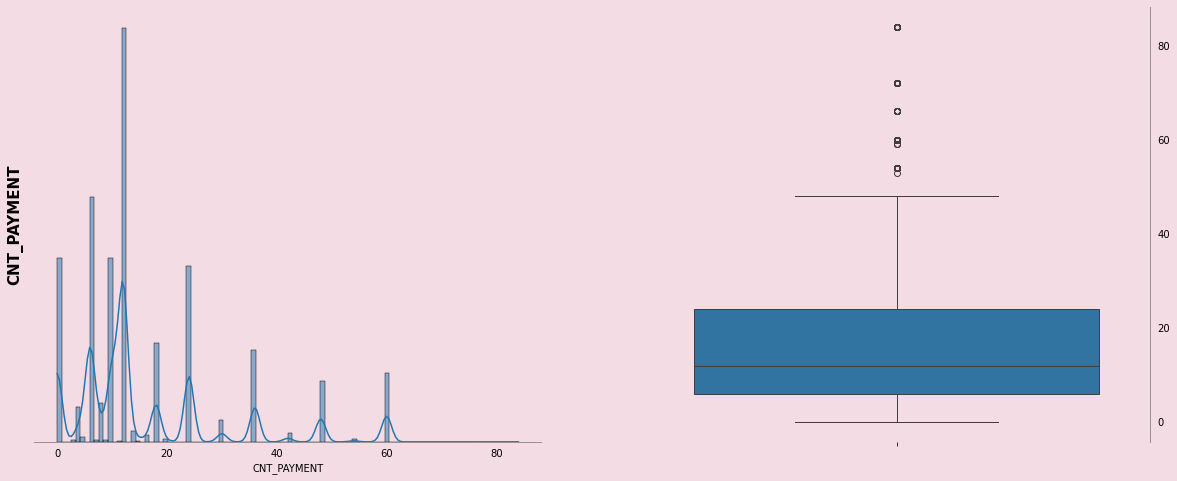

In [17]:
#CNT_PAYMENT
obj1 = Univariate_Analysis(df= df, col= 'CNT_PAYMENT', num= True)
obj1.visualize()

phân bố của thời hạn trả ( CNT - PAYMENT) chủ yếu là trong khoảng 0 - 40 

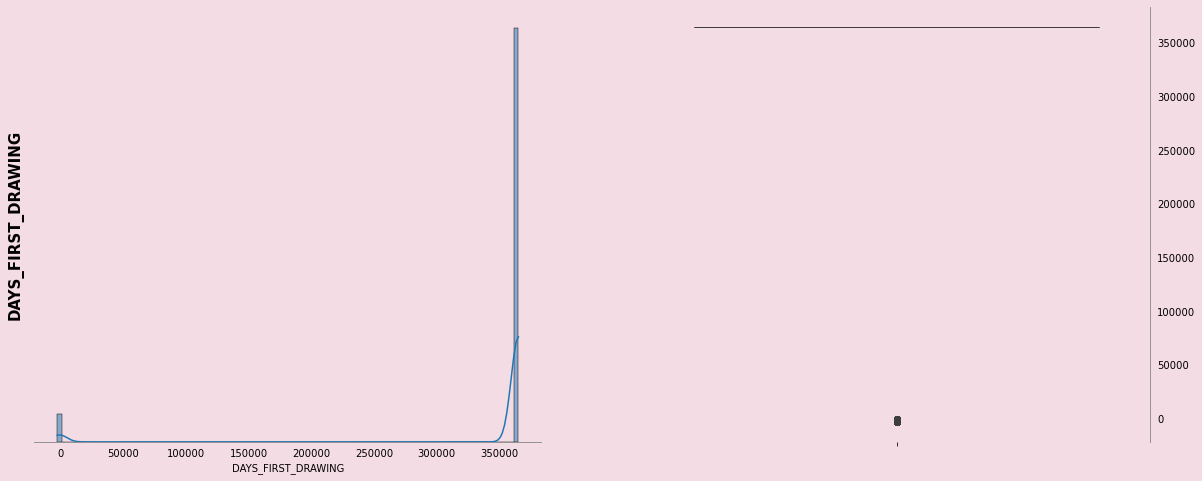

In [18]:
# DAYS_FIRST_DRAWING
obj2= Univariate_Analysis(df = df, col = 'DAYS_FIRST_DRAWING', num =True)
obj2.visualize()

In [19]:
df[df['DAYS_FIRST_DRAWING'] > 350000]['DAYS_FIRST_DRAWING']

0          365243.0
2          365243.0
3          365243.0
4          365243.0
5          365243.0
             ...   
1413695    365243.0
1413696    365243.0
1413697    365243.0
1413698    365243.0
1413699    365243.0
Name: DAYS_FIRST_DRAWING, Length: 799094, dtype: float64

* Ta thấy rằng  có giá trị quá là lớn và sai bản chất cụ thể ở đây chính là 365243 và giá trị cũng thấy ở các cột features liên quan đến ngày. Cho nên ta quy ước rằng đây là giá trị nan 

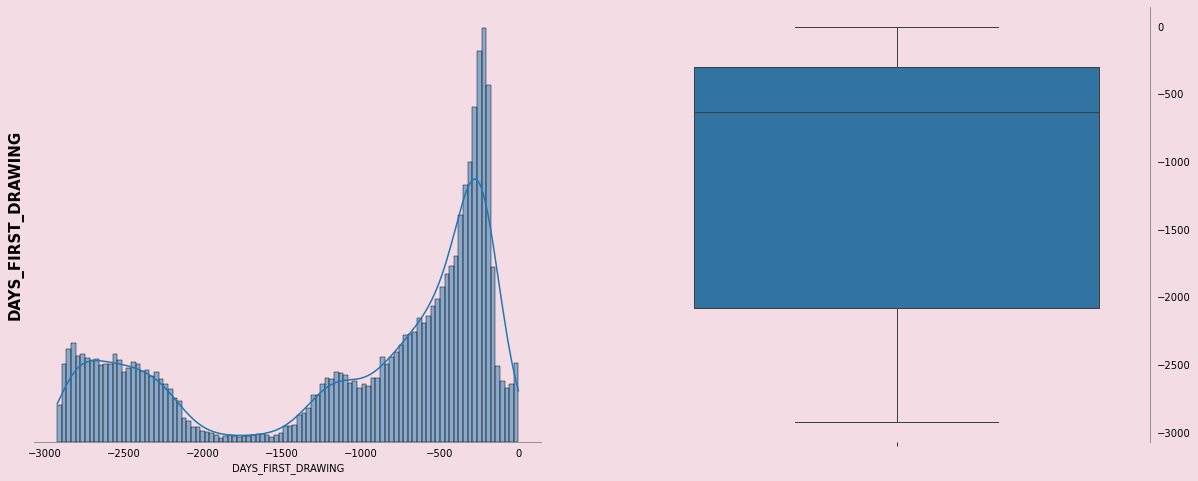

In [20]:
df.replace({'DAYS_FIRST_DRAWING':365243},np.nan,inplace=True)
obj2= Univariate_Analysis(df = df, col = 'DAYS_FIRST_DRAWING', num =True)
obj2.visualize()

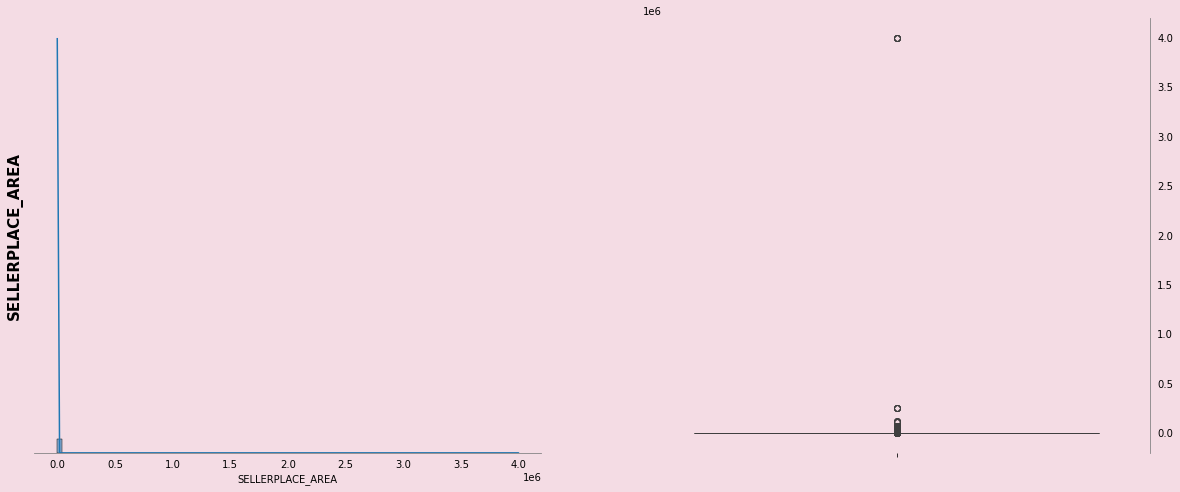

In [21]:
# SELLERPLACE_AREA
obj2 = Univariate_Analysis(df = df, col = 'SELLERPLACE_AREA',num= True)
obj2.visualize()

* Trong features này ta thấy một features rất lớn là 4x10^6 và nó vô lí nên ta cho nó bằng NaN

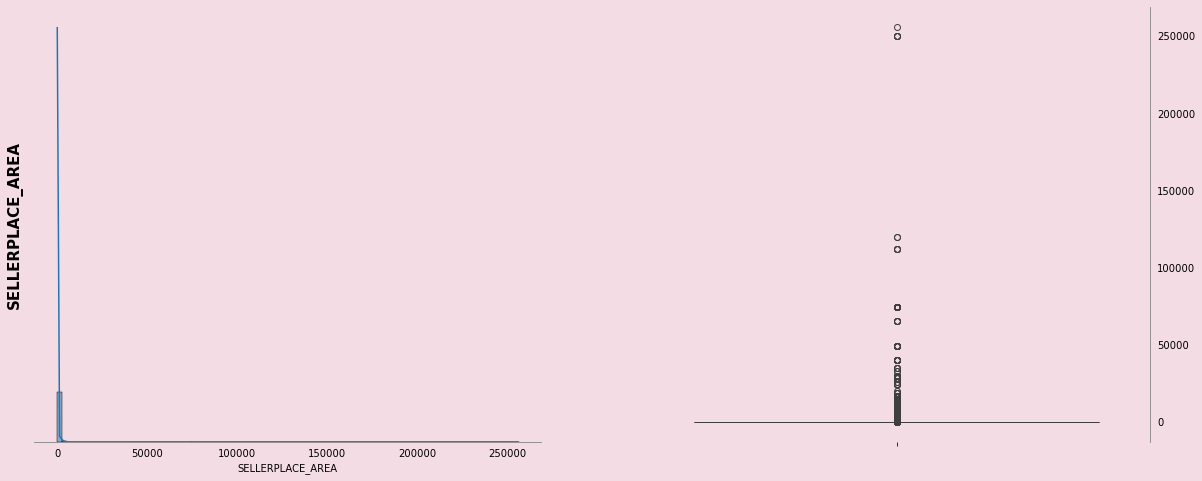

In [22]:
df['SELLERPLACE_AREA'].replace(4000000,np.nan,inplace=True)
obj2 = Univariate_Analysis(df = df, col = 'SELLERPLACE_AREA',num= True)
obj2.visualize()

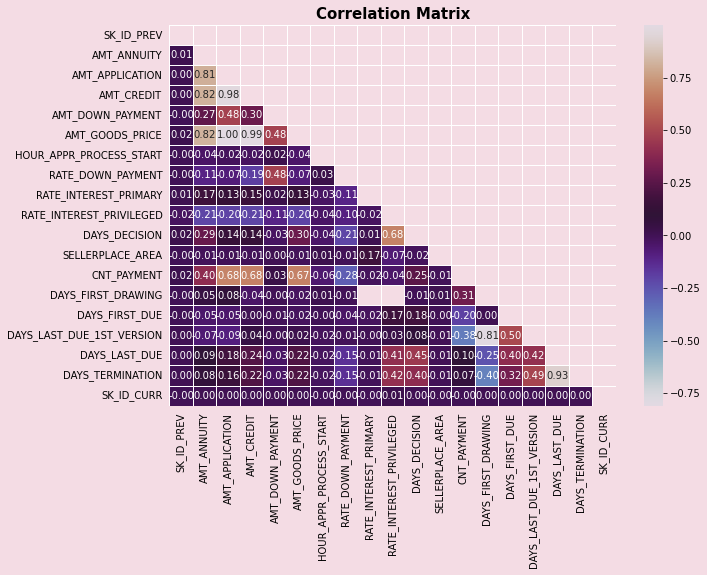

In [23]:
num = prev_check.numdf
# Correlation
draw_corr(num)

##### Note 
* From this table, We can gain an insight that 4 feature have high relationships, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT,AMT_GOODS_PRICE. 
* Also, this trend can be seen in between DAY_LAST_DUE_1ST_VERSION and DAYS_FIRST_DRAWING, DAYS_TERMINATION and DAY_LAST_DUE, so 365243 can appear in these columns


In [24]:
df.replace({'DAYS_FIRST_DRAWING':365243,'DAYS_FIRST_DUE':365243,'DAYS_LAST_DUE_1ST_VERSION':365243,
                                   'DAYS_LAST_DUE':365243,'DAYS_TERMINATION':365243}, np.nan, inplace=True)

In [25]:
df['AMT_INTEREST'] = df['CNT_PAYMENT'] * df['AMT_ANNUITY'] - df['AMT_CREDIT'] 

Text(0, 0.5, 'NAME_CONTRACT_TYPE')

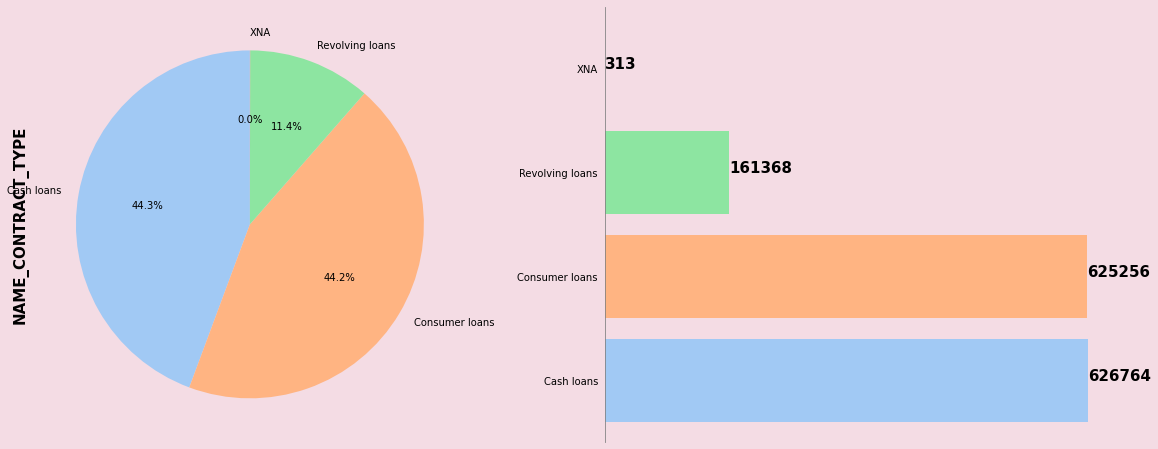

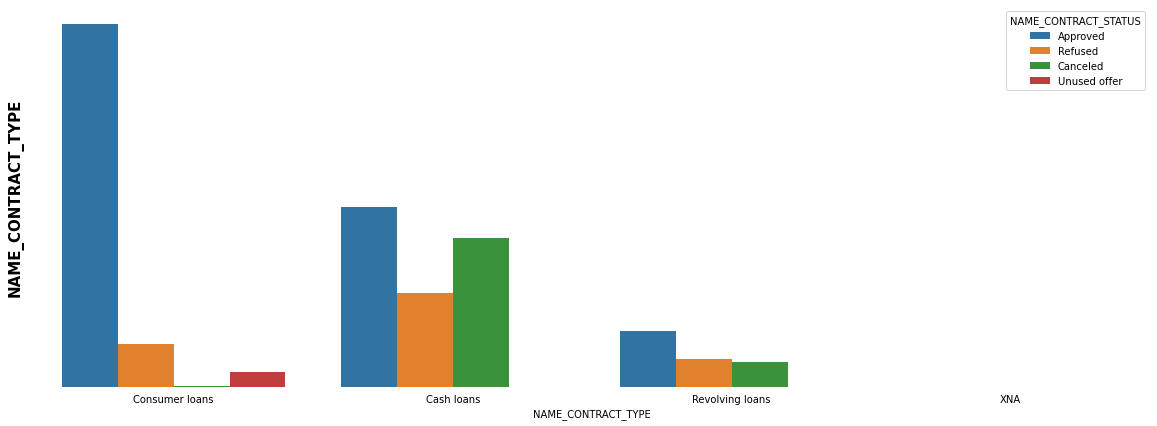

In [26]:
objb = Univariate_Analysis(df= df, col = 'NAME_CONTRACT_TYPE', num= False)
objb.visualize()

fig,ax = plt.subplots(figsize = (20,7))
sns.countplot(data = df, x = 'NAME_CONTRACT_TYPE', hue = 'NAME_CONTRACT_STATUS',dodge=True,ax = ax)
ax.spines[['left','right','top','bottom']].set_visible(False)
ax.set_yticklabels([])
ax.tick_params(left = False, bottom = False)
ax.set_ylabel('NAME_CONTRACT_TYPE', size = 15, weight = 'bold')

* Consumer loans and Cash Loans are 2 famous types in this bank 
+ But, almost the Clients take a consumer loans which has a highest number of approved applications.While Cash loan is lower and more risker to be canceled. 

Text(0, 0.5, 'NAME_CONTRACT_TYPE')

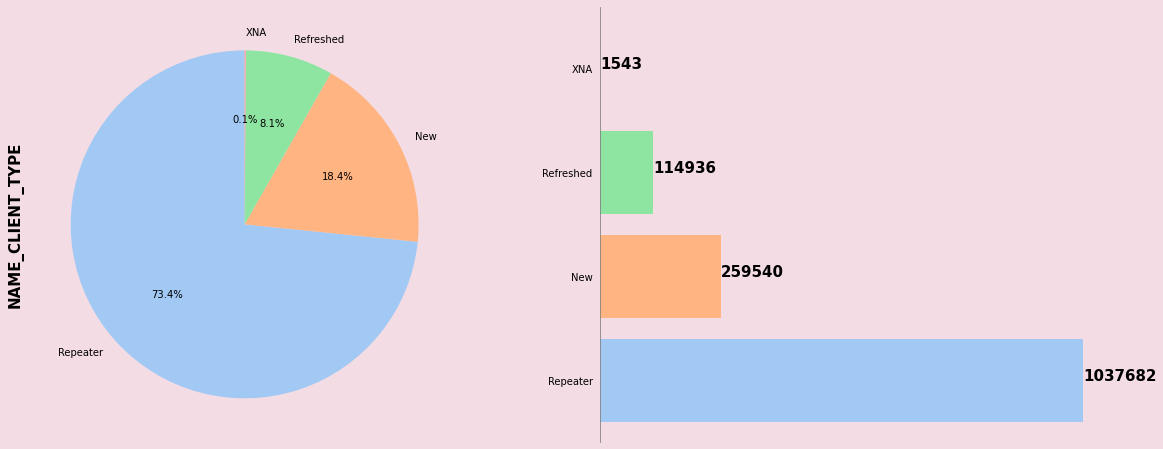

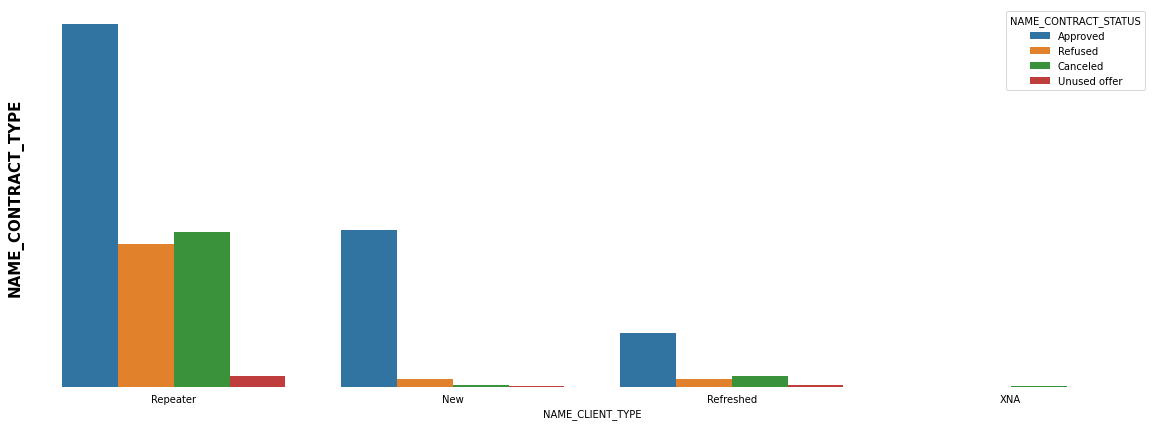

In [27]:
objc = Univariate_Analysis(df= df, col = 'NAME_CLIENT_TYPE', num= False)
objc.visualize()

fig,ax = plt.subplots(figsize = (20,7))
sns.countplot(data = df, x = 'NAME_CLIENT_TYPE', hue = 'NAME_CONTRACT_STATUS',dodge=True,ax = ax)
ax.spines[['left','right','top','bottom']].set_visible(False)
ax.set_yticklabels([])
ax.tick_params(left = False, bottom = False)
ax.set_ylabel('NAME_CONTRACT_TYPE', size = 15, weight = 'bold')

+ Phần lớn các  khoản vay đều đã là những người đã từng vay (Repeater)

## EDA External


In [28]:
app_train = pd.read_csv('D:\\DSEB 63 - NEU\\Năm BA\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv')
app_train = app_train[['SK_ID_CURR','TARGET']]

In [29]:
merge_table = pd.merge(df,app_train,on='SK_ID_CURR',how='left')
merge_table.head()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR,AMT_INTEREST,TARGET
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,0.0,293189,3620.16,NaN
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,...,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189,702590.58,NaN
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,...,POS industry with interest,NaN,-512.0,-182.0,-392.0,-387.0,0.0,293189,29160.18,NaN
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0,91587,227119.14,0.0
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,Cash X-Sell: low,NaN,-485.0,565.0,-155.0,-147.0,1.0,91587,269158.50,0.0


In [30]:
split_tool =pre_check_tool(merge_table)
split_tool.split_data()

### Numerical Columns

In [31]:
numdf = split_tool.numdf.drop(columns = 'SK_ID_CURR')
numdf['TARGET'] = merge_table['TARGET']

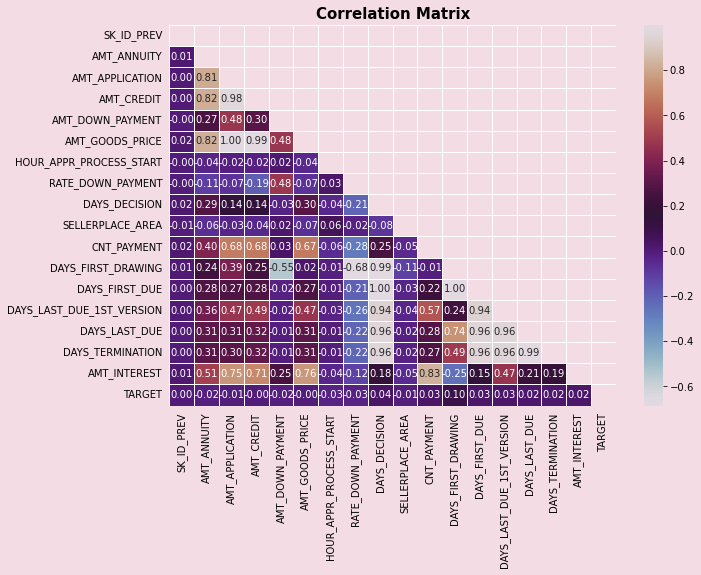

In [32]:
draw_corr(numdf)

In [33]:
# 'AMT_ANNUITY','AMT_CREDIT','AMT_DOWN_PAYMENT','CNT_PAYMENT','AMT_ANNUITY'
money = merge_table[['AMT_APPLICATION','AMT_ANNUITY','AMT_CREDIT','AMT_DOWN_PAYMENT','CNT_PAYMENT','AMT_ANNUITY','AMT_INTEREST','TARGET']]

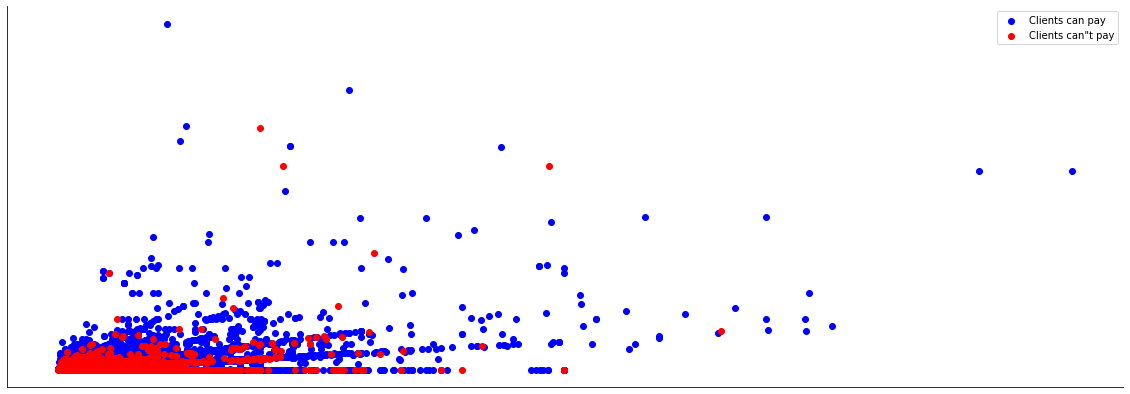

In [34]:
# Does the amount of total credit money and the amt_down_payment  reflect sth
fig,ax = plt.subplots(figsize  = (20,7))
ax.scatter(money[money['TARGET']==0]['AMT_CREDIT'],money[money['TARGET']==0]['AMT_DOWN_PAYMENT']\
           , color = 'blue',label = 'Clients can pay ')
ax.scatter(money[money['TARGET']==1]['AMT_CREDIT'],money[money['TARGET']==1]['AMT_DOWN_PAYMENT']\
           ,color = 'red',label = 'Clients can"t pay')

ax.tick_params(left = False,bottom = False)
ax.spines[['top','right']].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.legend()

* When the amount of loan money and down payment money increase, the probability of clients can pay the loan rise too. 

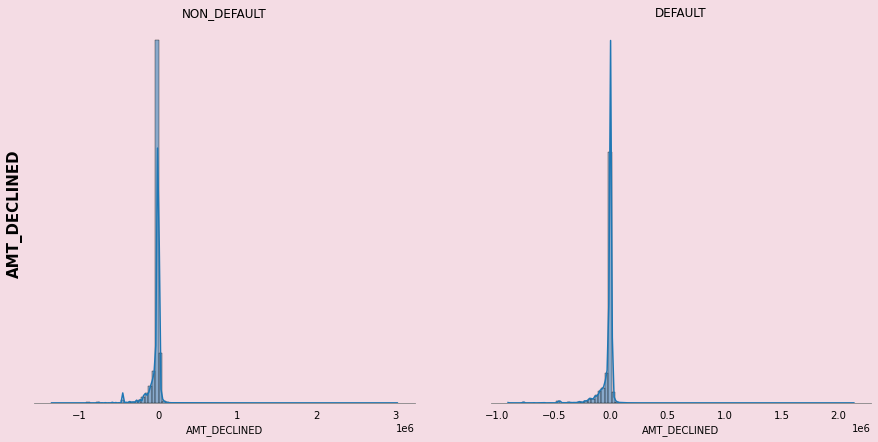

In [35]:
# The difference btw real money and expected money when making loan
money['AMT_DECLINED'] = money['AMT_APPLICATION'] - money['AMT_CREDIT']
obja = Bivariate_Analysis(df = money, col1 = 'AMT_DECLINED',num =True)
obja.plothistogram()

* Nhìn chung thì hầu như các khoản tiền mà khách hàng mong muốn được vay đều được giữ nguyên

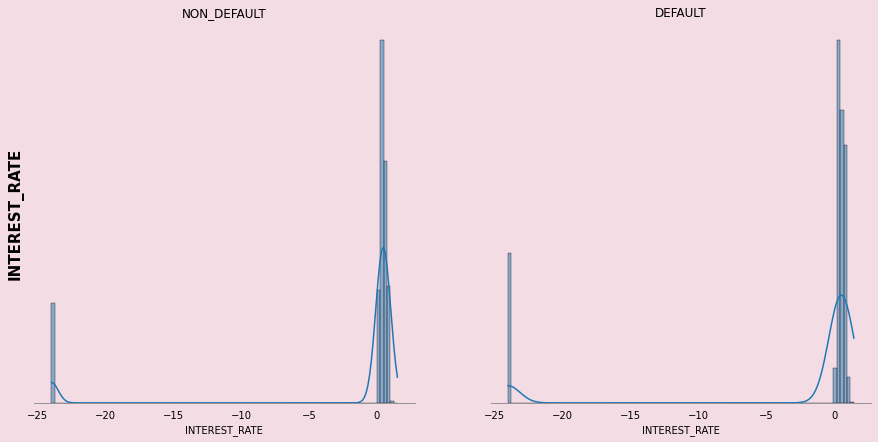

In [36]:
# Số tiền lãi mà ngân hàng nhận được cho mỗi khoản vay :AMT_INTEREST
# Lai suât hàng năm của ngân hàng (Tính theo lãi đơn)
money['INTEREST_RATE'] = 2*12*money['AMT_INTEREST']/(money['AMT_CREDIT']*(money['CNT_PAYMENT']+1))
obja = Bivariate_Analysis(df = money, col1 = 'INTEREST_RATE',num =True)
obja.plothistogram()


* Như vậy lãi suất ngân hàng không quá cao

### Categorical column

In [37]:
cat_data = merge_table.drop(columns = numdf.columns,axis = 1)
cat_data['TARGET'] = merge_table['TARGET']
cat_data = cat_data.drop(columns='SK_ID_CURR',axis = 1)
cat_data

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,Consumer loans,SATURDAY,Y,1,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest,0.0,NaN
1,Consumer loans,SATURDAY,Y,1,XAP,Refused,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,Furniture,low_normal,POS industry with interest,NaN,NaN
2,Consumer loans,SUNDAY,Y,1,XAP,Approved,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest,0.0,NaN
3,Cash loans,THURSDAY,Y,1,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low,1.0,0.0
4,Cash loans,WEDNESDAY,Y,1,XNA,Approved,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,Consumer loans,SATURDAY,Y,1,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Consumer Electronics,POS,XNA,Regional / Local,Consumer electronics,low_action,POS household without interest,0.0,0.0
1413697,Consumer loans,SATURDAY,Y,1,XAP,Approved,Cash through the bank,XAP,NaN,New,Audio/Video,POS,XNA,Stone,Consumer electronics,low_normal,POS household with interest,0.0,0.0
1413698,Consumer loans,FRIDAY,Y,1,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Construction Materials,POS,XNA,Regional / Local,Construction,middle,POS industry with interest,0.0,0.0
1413699,Consumer loans,FRIDAY,Y,1,XAP,Approved,Cash through the bank,XAP,NaN,New,Consumer Electronics,POS,XNA,Regional / Local,Consumer electronics,low_action,POS household without interest,0.0,0.0


In [38]:
# NAME_CONTRACT_TYPE, NAME_CONTRACT_STATUS, NAME_CASH_LOAN_PURPOSE ,NAME_CLIENT_TYPE
split = cat_data[['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS','TARGET']]
split

,NAME_CONTRACT_TYPE,NAME_CLIENT_TYPE,NAME_CONTRACT_STATUS,TARGET
0,Consumer loans,Repeater,Approved,NaN
1,Consumer loans,Repeater,Refused,NaN
2,Consumer loans,New,Approved,NaN
3,Cash loans,Repeater,Approved,0.0
4,Cash loans,Repeater,Approved,0.0
...,...,...,...,...
1413696,Consumer loans,New,Approved,0.0
1413697,Consumer loans,New,Approved,0.0
1413698,Consumer loans,New,Approved,0.0
1413699,Consumer loans,New,Approved,0.0


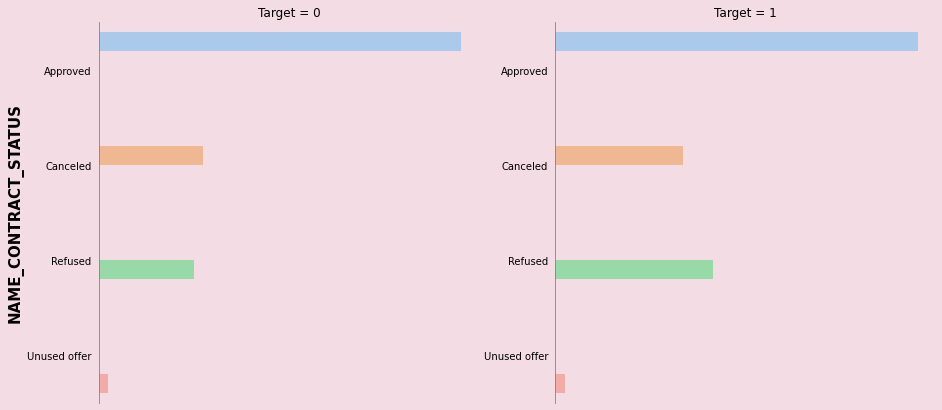

In [39]:
obj3 = Bivariate_Analysis(df = split, col1 = 'NAME_CONTRACT_STATUS', num= False)
obj3.countplot()

* Số lượng khoản vay đươc chấp thuận là như nhau cho cả 2 trường hợp nhưng trường hợp Target = 1( Default) thì có số đơn từ chối nhiều hơn

In [40]:
# NAME_PAYMENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE, NAME_SELLER_INDUSTRY, NAME_YIELD_GROUP, PRODUCT_COMBINATION
split = merge_table[['NAME_PAYMENT_TYPE','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY'
                     , 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION','TARGET']]

split

,NAME_PAYMENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET
0,Cash through the bank,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest,NaN
1,Cash through the bank,POS,XNA,Regional / Local,Furniture,low_normal,POS industry with interest,NaN
2,Cash through the bank,POS,XNA,Stone,Furniture,middle,POS industry with interest,NaN
3,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low,0.0
4,XNA,Cash,x-sell,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low,0.0
...,...,...,...,...,...,...,...,...
1413696,Cash through the bank,POS,XNA,Regional / Local,Consumer electronics,low_action,POS household without interest,0.0
1413697,Cash through the bank,POS,XNA,Stone,Consumer electronics,low_normal,POS household with interest,0.0
1413698,Cash through the bank,POS,XNA,Regional / Local,Construction,middle,POS industry with interest,0.0
1413699,Cash through the bank,POS,XNA,Regional / Local,Consumer electronics,low_action,POS household without interest,0.0


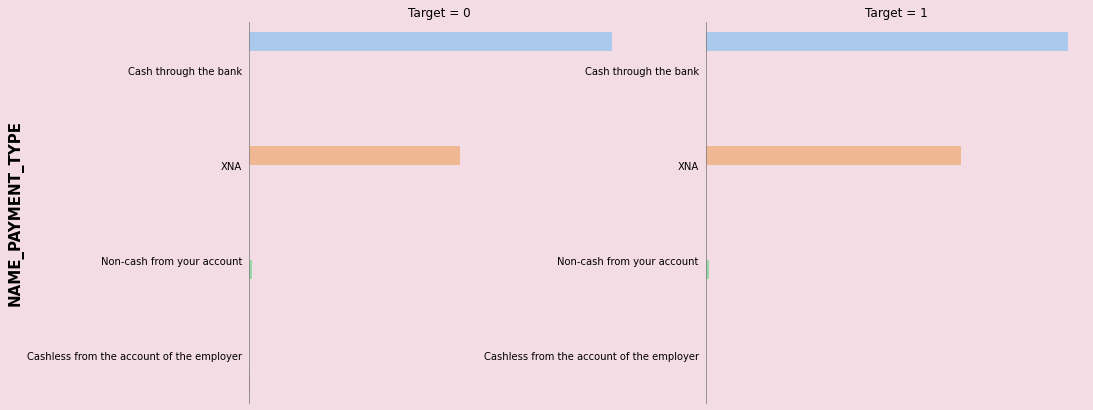

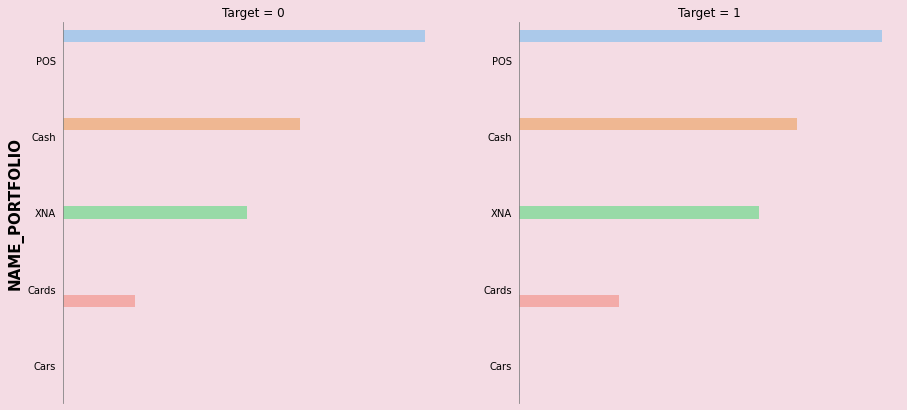

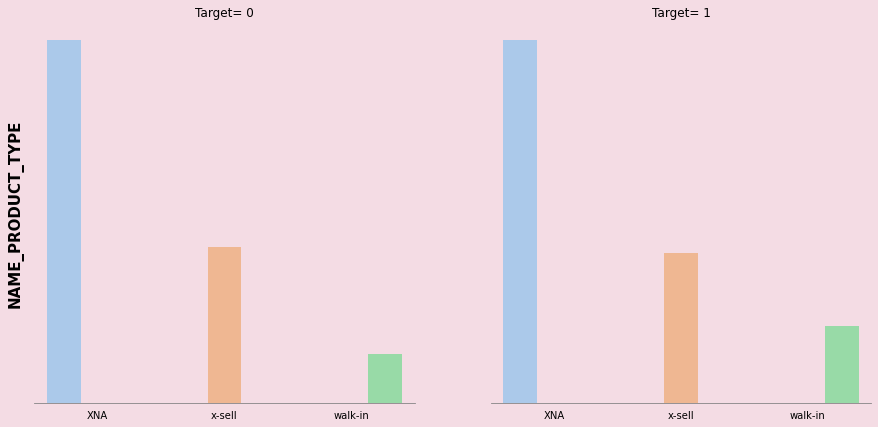

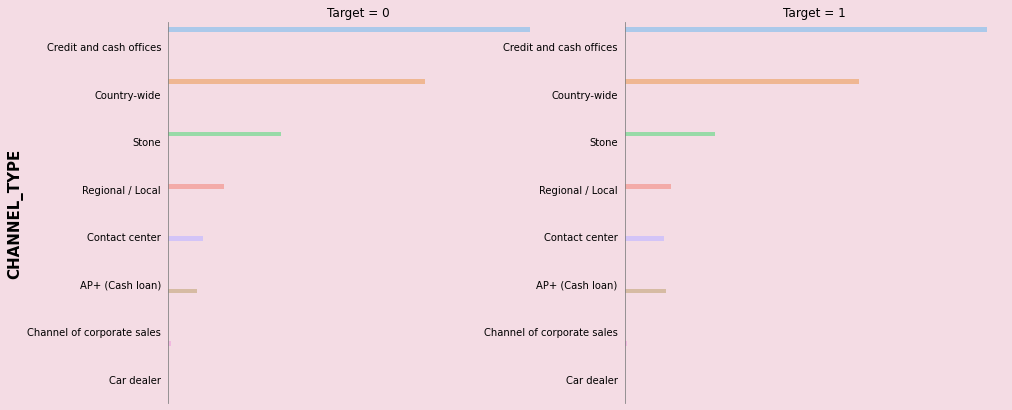

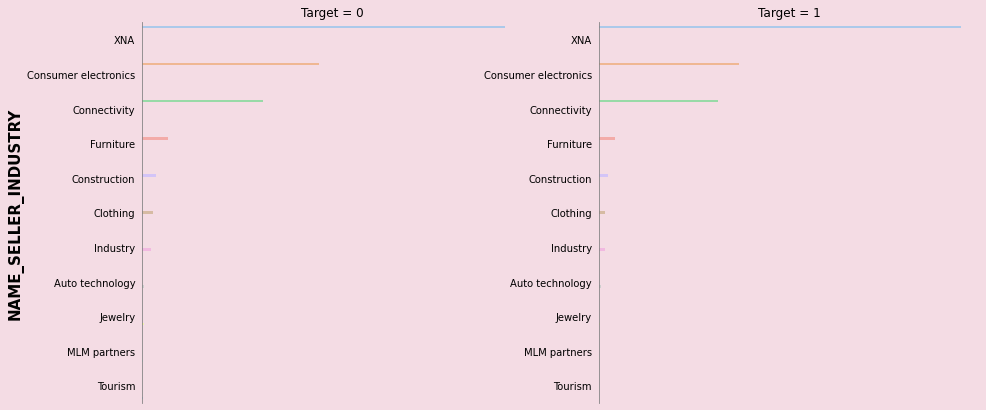

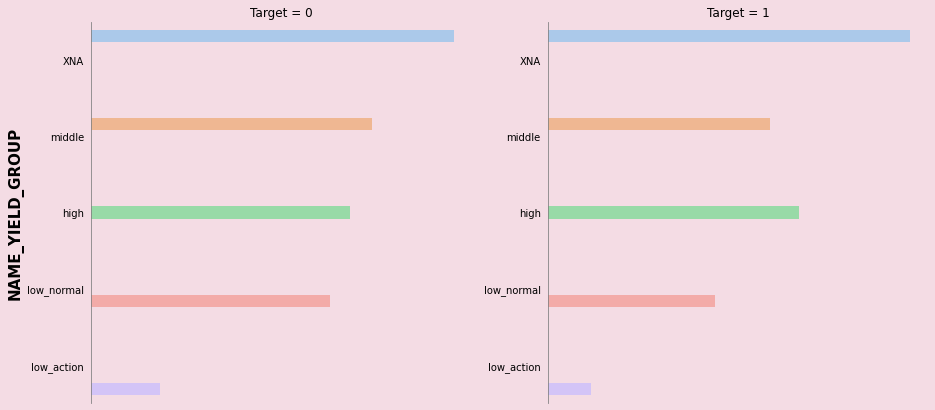

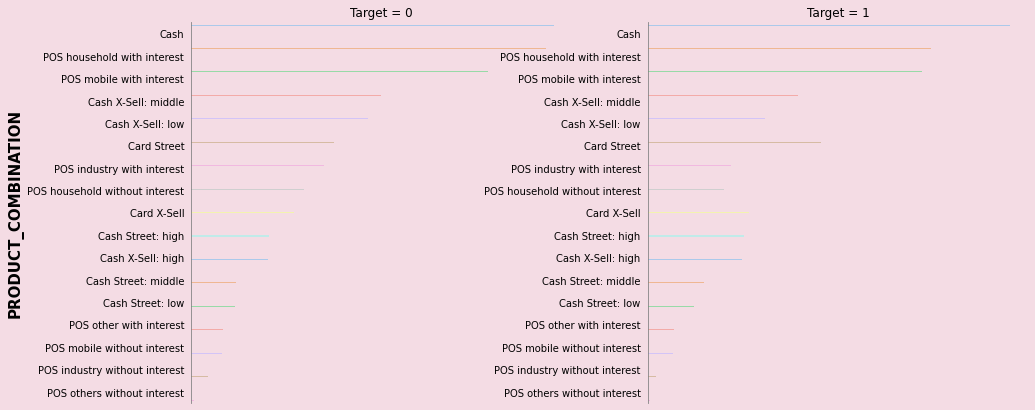

In [41]:
for col in split.columns[:-1]:
    obji =Bivariate_Analysis(df =split, col1=col,num=False)
    obji.countplot()

+ The most common way that Clients use to pay is Cash through the bank 
+ POS and Cash are the highest Portfolio in here

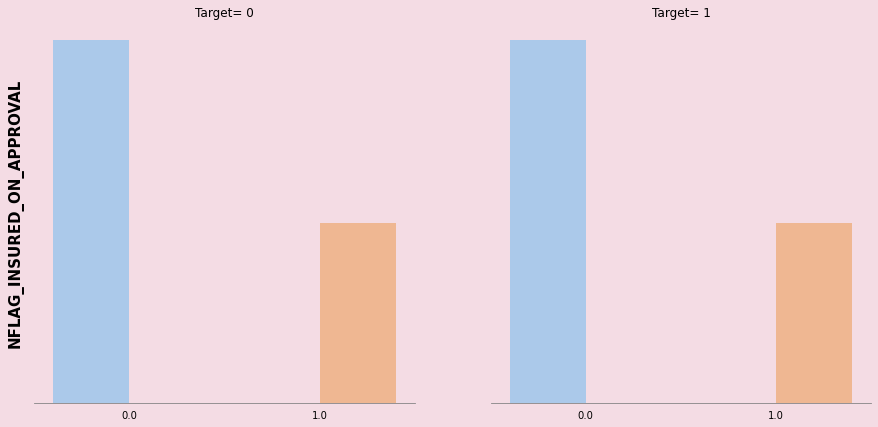

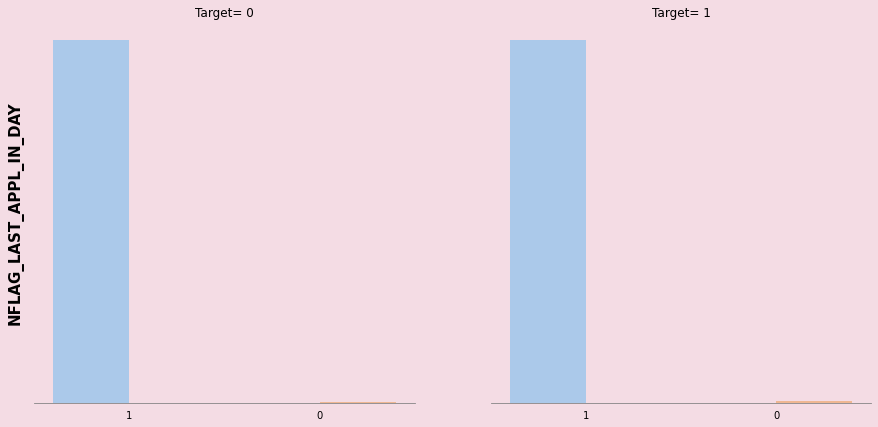

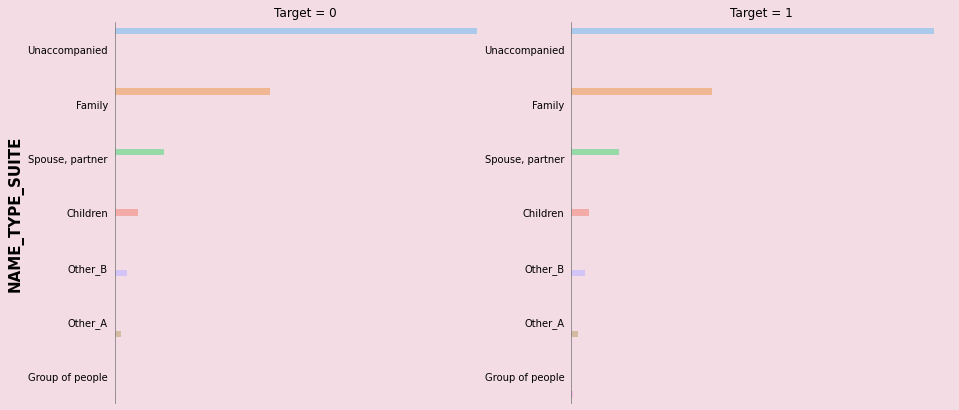

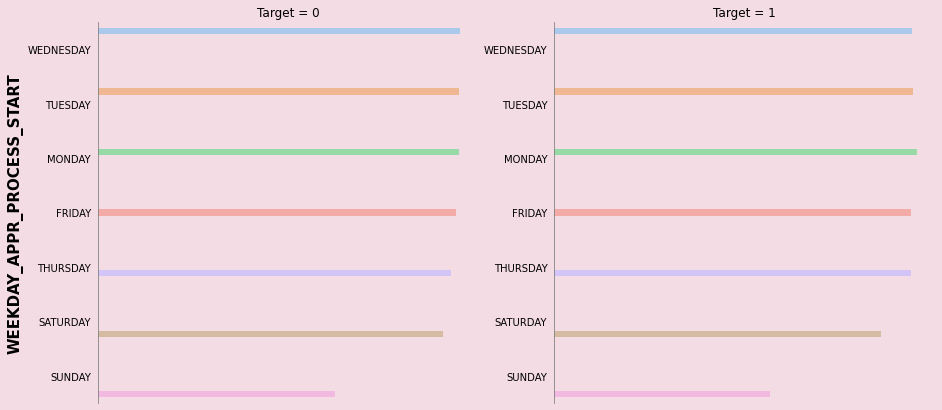

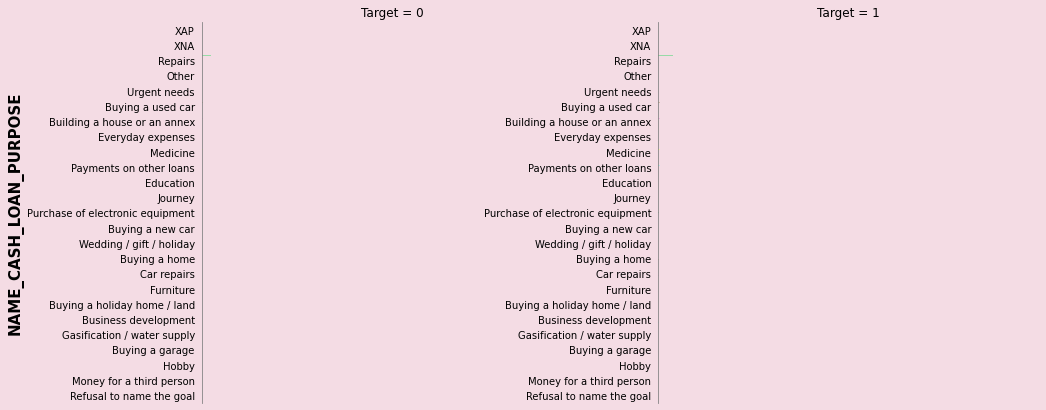

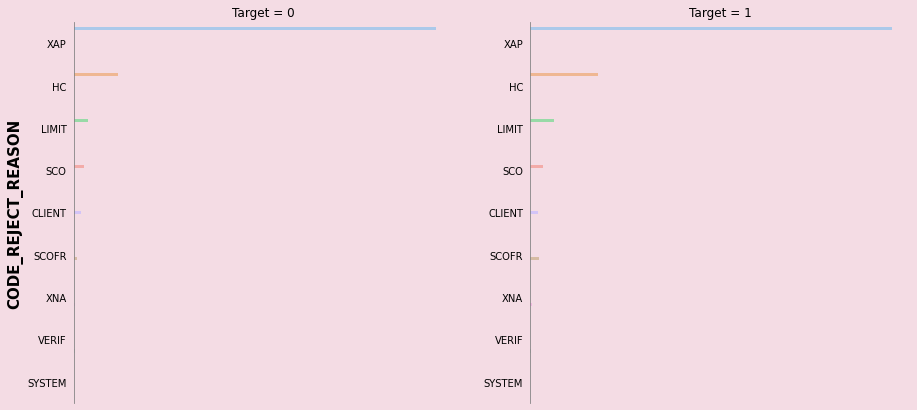

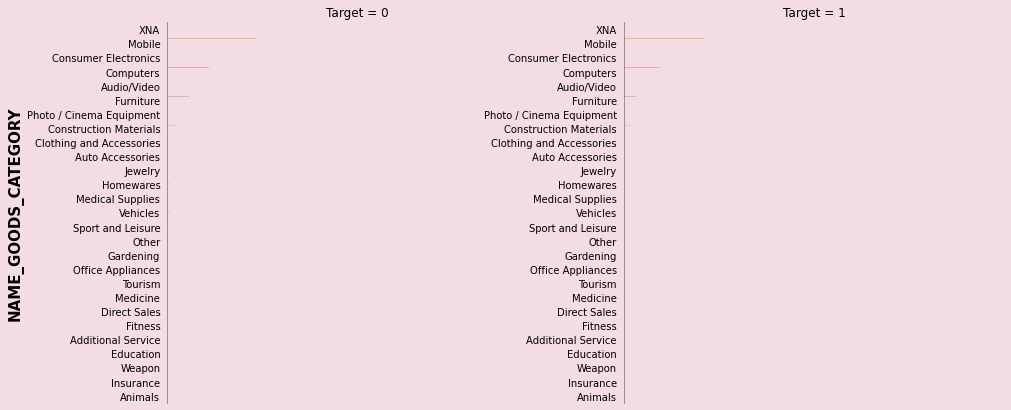

In [43]:
split1 = merge_table[['NFLAG_INSURED_ON_APPROVAL','NFLAG_LAST_APPL_IN_DAY','NAME_TYPE_SUITE',
                     'WEEKDAY_APPR_PROCESS_START','NAME_CASH_LOAN_PURPOSE','CODE_REJECT_REASON','NAME_GOODS_CATEGORY','TARGET']]
for col in split1.columns[:-1]:	
    obji =Bivariate_Analysis(df =split1, col1=col,num=False)
    obji.countplot()

